# Nairobi Hospital Hypothyroidism Prediction

> Overview

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients.

## 1. Defining the Question

### a) Specifying the Question

>
* Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.



### b) Defining the Metric for Success

This project will be successful when: 

* The model can determine whether or nit the patient's symptoms indicate that the patient has hypothyroid.

### c) Understanding the context 

>The project was carried out to create a prediction model needed to predict hypothyroidism in patients, based on their symptoms. Data used to train and test the model was provided by the Nairobi Hospital's Endocrynology department.

### d) Recording the Experimental Design

Part 1: Decision trees:
- For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
- Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
- Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
- Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM.

Part 2: SVM:

- In this section, you may be required to clean the data a little bit so as to make sense of the features.

- Document what transformation you've done on the data.

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

-  After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version. 

### e) Data Relevance

The dataset to use for this project can be found by following this [link](http://bit.ly/hypothyroid_data)

Below is the dataset glossary:
* Age
* Sex
* on_thyroxine
* query_on_thyroxine
* on_antithyroid_medicationthyroid_surgery
* query_hypothyroid
* query_hyperthyroid
* pregnant
* sick
* tumor
* lithium
* goitre
* TSH_measured
* TSH
* T3_measured
* T3
* TT4_measured
* TT4


## 2. Reading the Data

In [2]:
# Installing packages
!pip install factor_analyzer==0.2.3

In [3]:
# Loading the libraries
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
from scipy.stats import bartlett, chi2, loguniform
import os
from scipy import stats
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import FactorAnalyzer
import statsmodels.formula.api as smf
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import bartlett
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
# Using seaborn style defaults and setting the default figure size
sb.set(rc={'figure.figsize':(30, 5)})
from warnings import filterwarnings
filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Accessing working directory
os.chdir('/content/drive/My Drive/Machine Learning: Supervised/Week 8 IP')

Mounted at /content/drive


In [5]:
# Loading the Dataset 
df = pd.read_csv('hypothyroid.csv',na_values = {'?'})

## 3. Checking the Data

In [6]:
# Determining the no. of records in our dataset
print(df.shape)

(3163, 26)


In [7]:
# Previewing the top of our dataset
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,...,y,0.6,y,15.0,y,1.48,y,10.0,n,NaN
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,...,y,1.7,y,19.0,y,1.13,y,17.0,n,NaN
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,...,y,0.2,y,4.0,y,1.00,y,0.0,n,NaN
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,...,y,0.4,y,6.0,y,1.04,y,6.0,n,NaN
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,...,y,1.2,y,57.0,y,1.28,y,44.0,n,NaN


In [8]:
# Previewing the bottom of our dataset
df.tail() 

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58.0,F,f,f,f,f,f,f,f,...,y,1.7,y,86.0,y,0.91,y,95.0,n,NaN
3159,negative,29.0,F,f,f,f,f,f,f,f,...,y,1.8,y,99.0,y,1.01,y,98.0,n,NaN
3160,negative,77.0,M,f,f,f,f,f,f,f,...,y,0.6,y,71.0,y,0.68,y,104.0,n,NaN
3161,negative,74.0,F,f,f,f,f,f,f,f,...,y,0.1,y,65.0,y,0.48,y,137.0,n,NaN
3162,negative,56.0,F,t,f,f,f,f,f,f,...,y,1.8,y,139.0,y,0.97,y,143.0,n,NaN


In [9]:
# Checking whether each column has an appropriate datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   object 
 1   age                        2717 non-null   float64
 2   sex                        3090 non-null   object 
 3   on_thyroxine               3163 non-null   object 
 4   query_on_thyroxine         3163 non-null   object 
 5   on_antithyroid_medication  3163 non-null   object 
 6   thyroid_surgery            3163 non-null   object 
 7   query_hypothyroid          3163 non-null   object 
 8   query_hyperthyroid         3163 non-null   object 
 9   pregnant                   3163 non-null   object 
 10  sick                       3163 non-null   object 
 11  tumor                      3163 non-null   object 
 12  lithium                    3163 non-null   object 
 13  goitre                     3163 non-null   objec

## 4. External Data Source Validation

> We don't have any other external data set to compare with this data set

## 5. Data Preperation/Tidying the Dataset

### a.Validation

In [10]:
# Checking for irrelevant columns
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

> So far all the columns are relevant

### b. Completeness

In [11]:
# Checking for missing values
df.isnull().any().any()

True

In [12]:
# Identifying the Missing Data
df.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

> We have missing values

In [13]:
# Checking percentage of missing values per columns
missing_columns = []
for i, col in enumerate(df.columns):
  missing = (df[col].isnull().sum()/df.shape[0])*100
  if missing > 0:
    missing_columns.append(col)
  print(f'{i+1}. {col} = {(df[col].isnull().sum()/df.shape[0])*100}%')

1. status = 0.0%
2. age = 14.1005374644325%
3. sex = 2.3079355042681002%
4. on_thyroxine = 0.0%
5. query_on_thyroxine = 0.0%
6. on_antithyroid_medication = 0.0%
7. thyroid_surgery = 0.0%
8. query_hypothyroid = 0.0%
9. query_hyperthyroid = 0.0%
10. pregnant = 0.0%
11. sick = 0.0%
12. tumor = 0.0%
13. lithium = 0.0%
14. goitre = 0.0%
15. TSH_measured = 0.0%
16. TSH = 14.796079671198228%
17. T3_measured = 0.0%
18. T3 = 21.97281062282643%
19. TT4_measured = 0.0%
20. TT4 = 7.872273158393931%
21. T4U_measured = 0.0%
22. T4U = 7.840657603540942%
23. FTI_measured = 0.0%
24. FTI = 7.809042048687955%
25. TBG_measured = 0.0%
26. TBG = 91.77995573822321%


> TBG has a very high percentage of missing values. It has to be dropped.

In [14]:
# The columns with missing values
missing_columns

['age', 'sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

In [15]:
# Dropping TBG
df.drop('TBG', axis = 1, inplace = True)

In [16]:
# Dealing with the missing values in Categorical columns [sex]
df.sex.value_counts()

F    2182
M     908
Name: sex, dtype: int64

In [17]:
# Since F is the majority (mode), we will fill all the NaN values with 'F'
df.fillna('F', inplace = True)

In [18]:
# Converting the numeric columns from object type to numeric datatypes.
# For the numeric columns, will fill the missing values using the column's mean.
columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
for col in columns:
  df[col] = pd.to_numeric(df[col],errors='coerce')
for col in columns:
  df[col].fillna(df[col].mean(), inplace = True)

In [19]:
# Checking for null values again
df.isnull().any().any()

False

> All null values have been dealt with

### c. Consistency

In [20]:
# Checking for duplicates
df.duplicated().any().any()

True

In [21]:
# Dropping duplicates
df.drop_duplicates(inplace = True)
# Checking changes
df.duplicated().any().any()

False

> The duplicate data in our dataset have been dropped. The result dataset has no duplicates.

In [22]:
# Determining the no. of records in our dataset
print(df.shape)

(3007, 25)


### d. Uniformity

In [23]:
# Checking column names
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

> The columns naming is non-uniform. They need to be changed to a similar case i.e lowecase

In [24]:
# Changing all column names to lower case
df.columns = df.columns.str.lower()
# Checking changes
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured'],
      dtype='object')

### e. Outliers

In [25]:
# Creating an outliers function
def outliers(data):
  # IQR
  Q1, Q3, IQR = 0, 0, 0
  outliers = pd.DataFrame()
  # Numerical columns
  numerical = data.select_dtypes(include = ['int64', 'float64'])
  Q1 = numerical.quantile(0.25)
  Q3 = numerical.quantile(0.75)
  IQR = Q3 - Q1
  # Outliers
  outliers = numerical[((numerical < (Q1 - 1.5 * IQR)) |(numerical > (Q3 + 1.5 * IQR))).any(axis=1)]
  print(f'Number of outliers = {outliers.shape[0]}')
  print(f'Percentage = {(outliers.shape[0]/data.shape[0])*100}%')

In [26]:
# Checking for Outliers
outliers(df)

Number of outliers = 655
Percentage = 21.78250748254074%


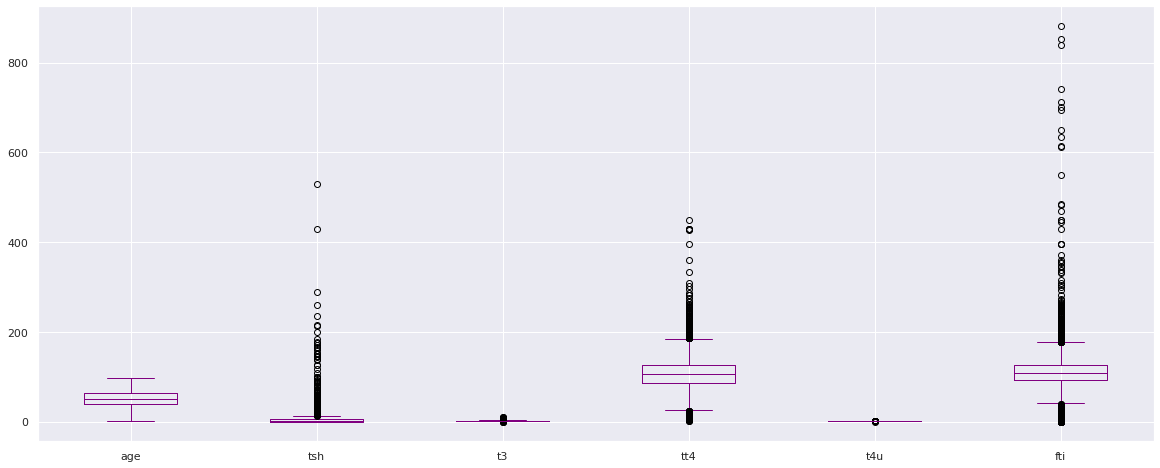

In [27]:
# Viewing the outliers
df.boxplot(figsize=(20,8),color='purple')

Though we have a great number of outliers in tsh, tt4 and fti, they form over 21% of our data set hence dropping them will hugely affect our analysis. Thus, will keep them and standadize the data later.

### f. Anomalies

In [28]:
# Checking for Anomalies
df.describe()

,age,tsh,t3,tt4,t4u,fti
count,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000
mean,51.350030,5.823557,1.934882,108.714583,0.977593,115.484252
std,17.864731,22.470602,0.876120,43.395720,0.219705,58.535310
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,38.000000,0.000000,1.500000,85.000000,0.860000,92.000000
50%,51.154214,1.000000,1.939749,106.000000,0.970000,109.000000
75%,64.000000,5.300000,2.200000,125.000000,1.060000,126.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


> The maximum value for tsh is 530 and mean is 5.8 & sd is 22.47, this value seems to be abnormal

In [29]:
df.tsh.unique()

array([3.00000000e+01, 1.45000000e+02, 0.00000000e+00, 4.30000000e+02,
       7.30000000e+00, 1.38000000e+02, 7.70000000e+00, 2.10000000e+01,
       9.20000000e+01, 4.80000000e+01, 3.60000000e+01, 1.50000000e+01,
       1.53000000e+01, 2.50000000e+01, 6.10000000e+01, 2.80000000e+01,
       1.70000000e+02, 5.40000000e+01, 2.16000000e+02, 5.60000000e+01,
       7.10000000e+01, 4.60000000e+01, 7.00000000e+01, 3.40000000e+01,
       5.30000000e+01, 9.40000000e+00, 1.26000000e+02, 1.00000000e+01,
       5.30000000e+02, 3.50000000e+01, 6.50000000e+01, 5.70000000e+01,
       1.25000000e+02, 2.30000000e+01, 8.00000000e+01, 1.17000000e+02,
       4.90000000e+01, 6.60000000e+01, 8.20000000e+00, 1.50000000e+02,
       5.92317996e+00, 1.80000000e+01, 1.65000000e+02, 1.64000000e+02,
       2.40000000e+01, 9.00000000e+01, 7.70000000e+01, 1.90000000e+01,
       5.80000000e+01, 1.00000000e+02, 2.13000000e+02, 1.70000000e+01,
       2.35000000e+02, 1.53000000e+02, 1.30000000e+01, 3.10000000e+01,
      

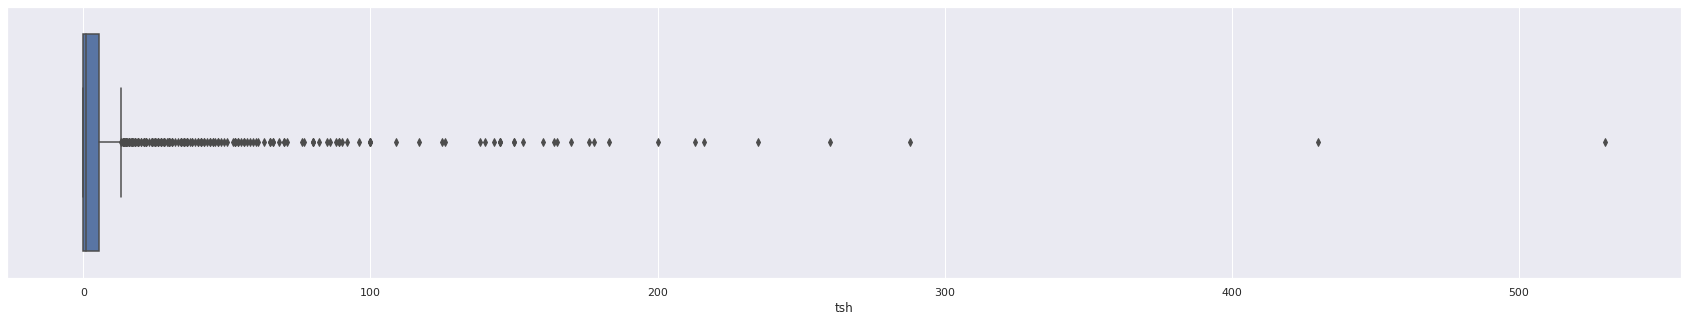

In [30]:
sb.boxplot(df.tsh)

> The values above 300 seems to be anomalies. Will drop them

In [31]:
df.drop(df[df['tsh'] > 300].index, inplace = True)

In [32]:
# Checking our dataset again
df.describe()

,age,tsh,t3,tt4,t4u,fti
count,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000
mean,51.356586,5.507965,1.935371,108.781614,0.977525,115.556288
std,17.863162,18.809682,0.875963,43.332227,0.219759,58.488103
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,38.000000,0.000000,1.500000,85.000000,0.860000,92.000000
50%,51.154214,1.000000,1.939749,106.000000,0.970000,109.000000
75%,64.000000,5.200000,2.200000,125.000000,1.060000,126.000000
max,98.000000,288.000000,10.200000,450.000000,2.210000,881.000000


> Our data set now looks okay

## 6. Exploratory Descriptive Analysis

#### a) Univariate Analysis

##### Categorical Analysis

> Frequecy tables, Bar Charts, Histograms, Pie charts etc.

In [33]:
# Number of unique values
cols = df.columns.tolist()
print(f'Number of unique values\n')
for col in cols:
  print(f'{col}: {len(df[col].unique().tolist())}')

Number of unique values

status: 2
age: 93
sex: 2
on_thyroxine: 2
query_on_thyroxine: 2
on_antithyroid_medication: 2
thyroid_surgery: 2
query_hypothyroid: 2
query_hyperthyroid: 2
pregnant: 2
sick: 2
tumor: 2
lithium: 2
goitre: 2
tsh_measured: 2
tsh: 238
t3_measured: 2
t3: 70
tt4_measured: 2
tt4: 269
t4u_measured: 2
t4u: 159
fti_measured: 2
fti: 279
tbg_measured: 2


In [34]:
# columns with specific data type
integer_columns = df.select_dtypes(include=['int64']).columns
float_columns = df.select_dtypes(include=['float64']).columns
object_columns = df.select_dtypes(include=['object']).columns

In [35]:
# categorical columns
object_columns

Index(['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 't3_measured', 'tt4_measured', 't4u_measured',
       'fti_measured', 'tbg_measured'],
      dtype='object')

In [36]:
# Categorical Plots
def CatPlots(column, data):
  fig,ax  = plt.subplots(figsize = (10,5))
  sb.countplot(data[column], palette = 'viridis', orient = 'v')
  plt.title('Bar Plot -  '+ column, fontsize=20, y = 1.05)
  plt.xlabel(column, fontsize=15)
  plt.ylabel('Count', fontsize=15)
  plt.show()

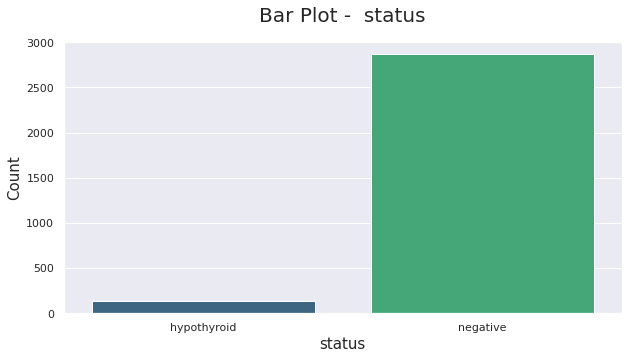

In [37]:
# Status count plot
CatPlots('status', df)

> Majority of the patients tasted negative

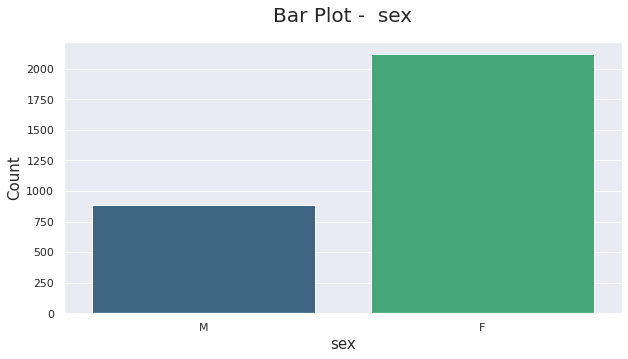

In [38]:
# Sex count plot
CatPlots('sex', df)

> Majority of the patients were Female

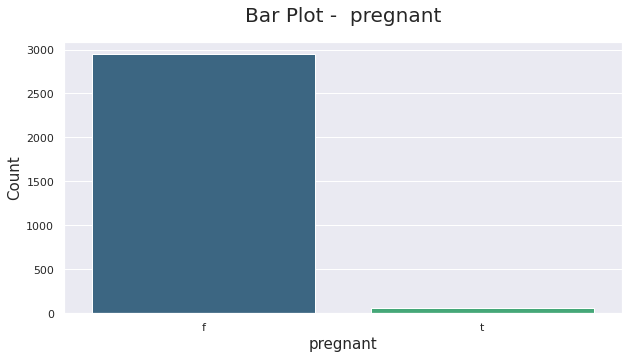

In [39]:
# pregnant count plot
CatPlots('pregnant', df)

> Majority of the patients were not pregnant

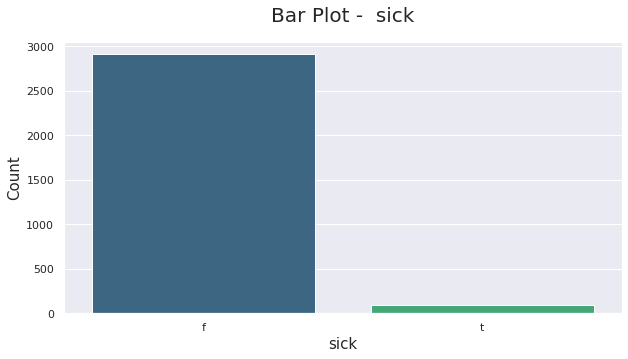

In [40]:
# sick count plot
CatPlots('sick', df)

> Majority of the patients were not sick

##### Numerical Analysis

> Measures of Central Tendency and Measures of Dispersion/Variability/Spread, 

In [41]:
# Describing the Data
df.describe()

,age,tsh,t3,tt4,t4u,fti
count,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000
mean,51.356586,5.507965,1.935371,108.781614,0.977525,115.556288
std,17.863162,18.809682,0.875963,43.332227,0.219759,58.488103
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,38.000000,0.000000,1.500000,85.000000,0.860000,92.000000
50%,51.154214,1.000000,1.939749,106.000000,0.970000,109.000000
75%,64.000000,5.200000,2.200000,125.000000,1.060000,126.000000
max,98.000000,288.000000,10.200000,450.000000,2.210000,881.000000


In [42]:
# Function that determines the measures of central tendency.
def MeasureCentral(measure, columns, data):
  for column in columns:
    if measure == 'mean':
      print(f"{column} column mean = {data[column].mean()}")
    elif measure == 'median':
      print(f"{column} column median = {data[column].median()}")
    elif measure == 'mode':
      print(f"{column} column mode = {data[column].mode()}")

In [43]:
# Function used to determine the measures of distribution.
def MeasureDistribution(measure, columns, data):
  for column in columns:
    if measure == 'range':
      print(f"{column} column range = {data[column].max() - data[column].min()}")
    elif measure == 'IQR':
      Q1 = data[column].quantile(0.25)
      Q3 = data[column].quantile(0.75)
      IQR = Q3 - Q1
      print(f"{column} column IQR = {IQR}")
    elif measure == 'var':
      print(f"{column} column variance = {data[column].var()}")
    elif measure == 'std':
      print(f"{column} column std = {data[column].std()}")
    elif measure == 'skew':
      print(f"{column} column skew = {data[column].skew()}")
    elif measure == 'kurt':
      print(f"{column} column kurt = {data[column].kurt()}")

In [44]:
# Distribution and Boxplot functions
def NumericalPlots(column, data1, data2):
  fig, ax = plt.subplots(2,2, figsize = (12,10))
  # Outliers
  # Distribution plot
  sb.distplot(data1[column], hist=True, ax=ax[0,0], color = 'green')
  ax[0,0].set_title('Outliers: Freq dist '+ column, fontsize=10)
  ax[0,0].set_xlabel(column, fontsize=8)
  ax[0,0].set_ylabel('Count', fontsize=8)
  # Box plot
  sb.boxplot(y = data1[column], ax = ax[0,1], color = 'green')
  ax[0,1].set_title(f'Outliers: Box Plot - {column}')
  ax[0,1].set_xlabel(column)

  # No outliers
  # Distribution plot
  sb.distplot(data2[column], hist=True, ax=ax[1,0], color = 'green')
  ax[1,0].set_title('No outliers: Freq dist '+ column, fontsize=10)
  ax[1,0].set_xlabel(column, fontsize=8)
  ax[1,0].set_ylabel('Count', fontsize=8)
  # Box plot
  sb.boxplot(y = data2[column], ax = ax[1,1], color = 'green')
  ax[1,1].set_title(f'No outliers: Box Plot - {column}')
  ax[1,1].set_xlabel(column)
  plt.show()

In [45]:
# Numerical columns
numerical = df.select_dtypes(exclude = 'object').columns.tolist()
numerical

['age', 'tsh', 't3', 'tt4', 't4u', 'fti']

In [46]:
# Mean
MeasureCentral('mean', numerical, df)

age column mean = 51.356586035910276
tsh column mean = 5.5079652798829395
t3 column mean = 1.9353707219463947
tt4 column mean = 108.78161397670557
t4u column mean = 0.9775247372161265
fti column mean = 115.55628804530204


In [47]:
# Median
MeasureCentral('median', numerical, df)

age column median = 51.154214206845786
tsh column median = 1.0
t3 column median = 1.9397487844408425
tt4 column median = 106.0
t4u column median = 0.97
fti column median = 109.0


In [48]:
# Mode
MeasureCentral('mode', numerical, df)

age column mode = 0    51.154214
dtype: float64
tsh column mode = 0    0.0
dtype: float64
t3 column mode = 0    1.939749
dtype: float64
tt4 column mode = 0    108.85
dtype: float64
t4u column mode = 0    0.978199
dtype: float64
fti column mode = 0    115.397771
dtype: float64


In [49]:
# Range
MeasureDistribution('range', numerical, df)

age column range = 97.0
tsh column range = 288.0
t3 column range = 10.2
tt4 column range = 448.0
t4u column range = 2.21
fti column range = 881.0


In [50]:
# IQR
MeasureDistribution('IQR', numerical, df)

age column IQR = 26.0
tsh column IQR = 5.2
t3 column IQR = 0.7000000000000002
tt4 column IQR = 40.0
t4u column IQR = 0.20000000000000007
fti column IQR = 34.0


In [51]:
# Variance
MeasureDistribution('var', numerical, df)

age column variance = 319.09254686689843
tsh column variance = 353.80412999578755
t3 column variance = 0.7673119308028343
tt4 column variance = 1877.6819030200393
t4u column variance = 0.04829421024660041
fti column variance = 3420.8581760322686


In [52]:
# Standard Deviation
MeasureDistribution('std', numerical, df)

age column std = 17.863161726494514
tsh column std = 18.809681815378685
t3 column std = 0.8759634300602019
tt4 column std = 43.332227072007726
t4u column std = 0.21975943721851948
fti column std = 58.48810285889147


In [53]:
# Skew
MeasureDistribution('skew', numerical, df)

age column skew = -0.19796029624893977
tsh column skew = 7.78769189698645
t3 column skew = 2.4210225257761175
tt4 column skew = 1.5195802773190137
t4u column skew = 0.9788172328936157
fti column skew = 5.372759523256055


In [54]:
# Kurtosis
MeasureDistribution('kurt', numerical, df)

age column kurt = -0.6097587287031461
tsh column kurt = 74.8911775341159
t3 column kurt = 14.435482589291775
tt4 column kurt = 7.444569197646349
t4u column kurt = 3.790944649773911
fti column kurt = 51.55314481887295


#### b) Bivariate Analysis

##### Numerical and Numerical

> Scatter plots, correlations etc

<Figure size 1440x576 with 0 Axes>

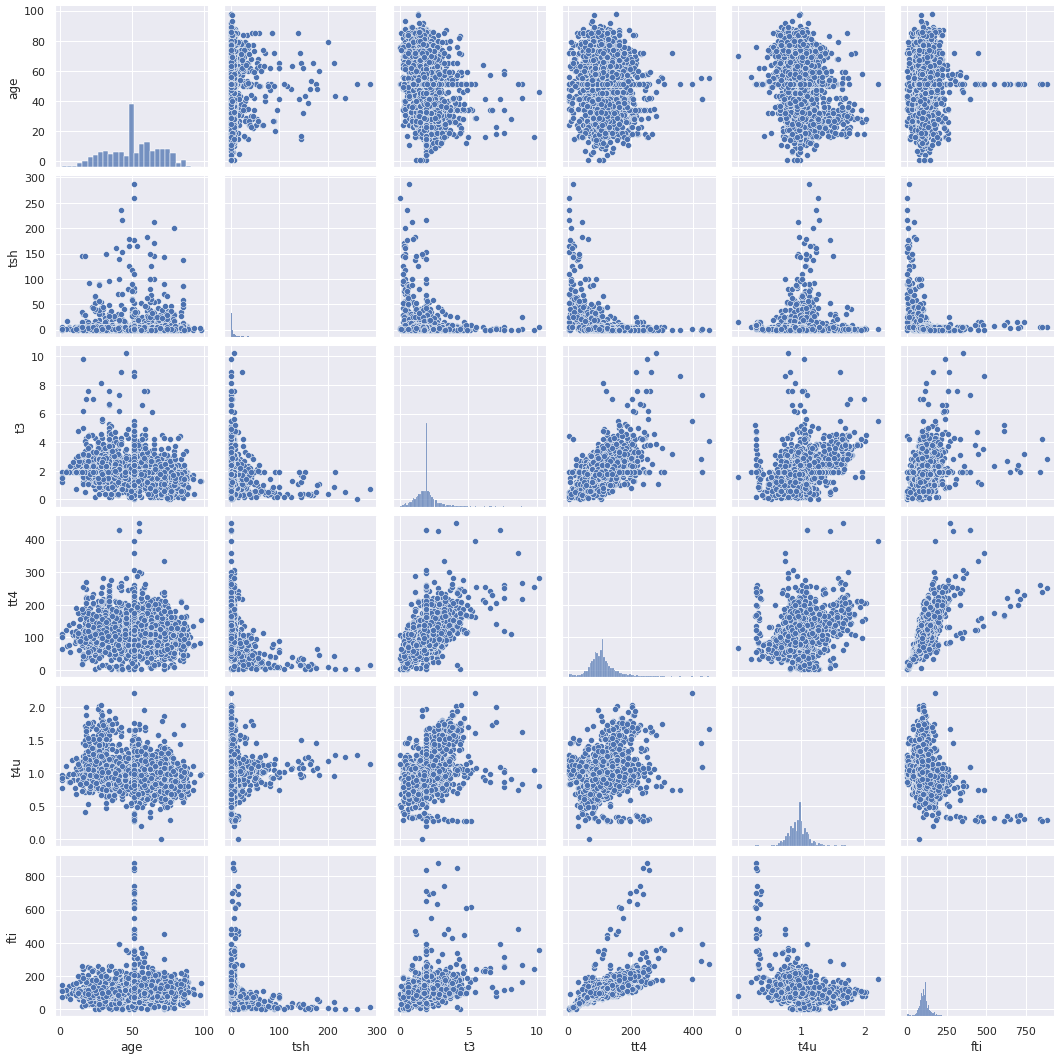

In [55]:
# Explore the types of relationships across the entire data set.
plt.figure(figsize=(20,8))
sb.pairplot(df)

> From the pairplots, we can some correlation between:
* t3 and tt4
* t3 and t4u
* t3 and fti
* tt4 and t4u
* tt4 and fti



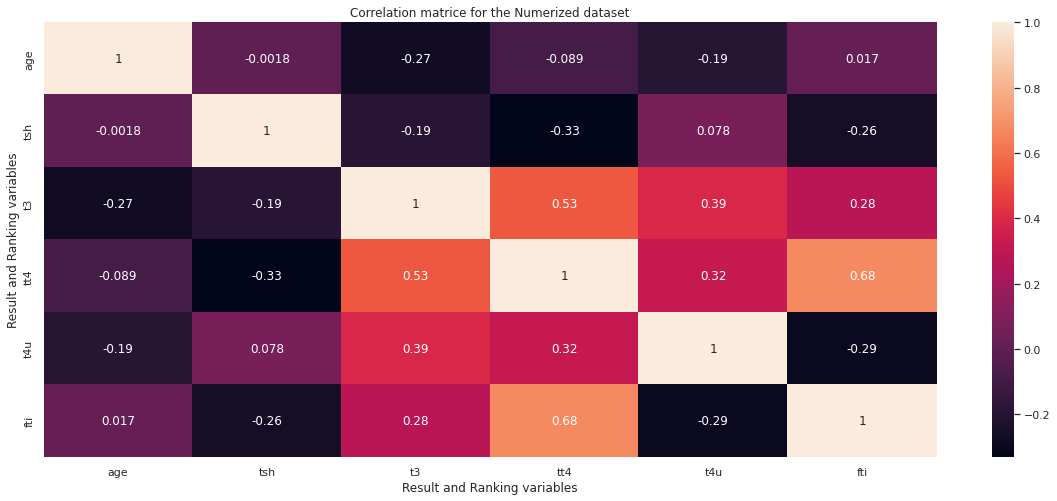

In [56]:
# Heatmap of correlation
plt.figure(figsize=(20,8))
corr_matrix = df.corr(method = 'pearson')

sb.heatmap(corr_matrix, annot = True)

plt.title("Correlation matrice for the Numerized dataset")

plt.xlabel("Result and Ranking variables")

plt.ylabel("Result and Ranking variables")

plt.show()

We see a strong correlation betweenm:
* tt4 and t3
* fti and tt4

We see a weak correlation between:
* t3 and age
* tt4 and tsh
* fti and tsh
* t3 and fti
* t3 and t4u
* tt4 and t4u

There is hardly a correlation between the remaining pairs (< +/- .2)

In [57]:
# defining a function to plot regression relation between two variables

def cor(col1,col2,d):
  ans = sb.regplot(x = col1, y = col2, data = d, scatter_kws = {"color": "red"}, line_kws = {"color": "black"})
  return ans

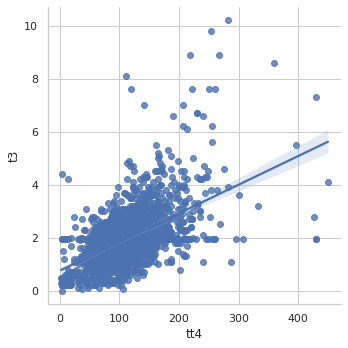

In [58]:
# tt4 vs t3
sb.set_style('whitegrid')
sb.lmplot(x='tt4',y='t3',data=df)

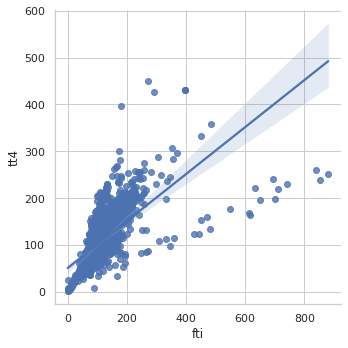

In [59]:
# fti vs tt4
sb.set_style('whitegrid')
sb.lmplot(x='fti',y='tt4',data=df)

##### Categorical and Categorical

> Stacked column charts etc

##### Categorical and Numerical

> Z-test, T-test, Line charts etc

#### c) Multivariet Analysis

> Feature reduction (LDA, PCA, FA etc), Feature selection, Feature Engineering, One-Hot Encoding, Label Encoding, Multicollinearity check etc.

##### Multicollinearity Check

Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=\frac{1}{1-R^2}

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

As we see from the formula, greater the value of R-squared, greater is the VIF. Hence, greater VIF denotes greater correlation. This is in agreement with the fact that a higher R-squared value denotes a stronger collinearity. Generally, a VIF above 5 indicates a high multicollinearity. 

In [60]:
# calculating VIF for each feature
# VIF function
def VIF(data):
  # Correlation matrix
  correlation = data.corr()
  # Inverse matrix
  inv_corr = pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)
  return inv_corr

In [61]:
VIF(df)

,age,tsh,t3,tt4,t4u,fti
age,1.097559,0.016553,0.305687,-0.109969,0.129242,0.011594
tsh,0.016553,1.215098,0.135274,0.747221,-0.496336,-0.378584
t3,0.305687,0.135274,1.623577,-0.422532,-0.531920,-0.297706
tt4,-0.109969,0.747221,-0.422532,4.692644,-2.483149,-3.592961
t4u,0.129242,-0.496336,-0.531920,-2.483149,2.811983,2.527257
fti,0.011594,-0.378584,-0.297706,-3.592961,2.527257,4.160617


> We don't have any VIF above 5 hence our dataset has no multicollinearity

##### Factor Analysis

Using factor analysis to identify which features or group of features highly determine whether or not someone suffer from thyroid

Will make the following assumptions:

* There are no outliers in data.
* Sample size should be greater than the factor.
* There should not be perfect multicollinearity.
* There should not be homoscedasticity between the variables.

In [62]:
# Size of original dataset 
df.shape

(3005, 25)

In [63]:
# Removing outliers 
def remove_outliers(df_in, col_name):
  Q1 = df[col_name].quantile(0.25)
  Q3 = df[col_name].quantile(0.75)
  IQR = Q3 - Q1
  df_out=  df_in[~ ((df_in[col_name]< (Q1 - 1.5 * IQR)) |(df_in[col_name] > (Q3 + 1.5 * IQR))).any(axis=1)]
  return df_out

In [64]:
# Removing the outliers
df_out = remove_outliers(df,numerical)
df_out.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,...,7.30000,y,1.200000,y,57.0,y,1.28,y,44.0,n
6,hypothyroid,64.0,F,f,f,f,t,f,f,f,...,7.70000,y,1.300000,y,54.0,y,0.86,y,63.0,n
48,hypothyroid,60.0,F,f,f,f,f,t,f,f,...,8.20000,y,1.700000,y,65.0,y,0.96,y,68.0,n
55,hypothyroid,41.0,F,f,f,f,f,f,f,f,...,5.92318,n,1.939749,y,44.0,y,0.90,y,49.0,n
71,hypothyroid,70.0,F,f,f,f,t,f,f,f,...,13.00000,y,1.800000,y,58.0,y,1.03,y,56.0,n


In [65]:
df_out.shape

(2351, 25)

In [66]:
df_factor = df_out[['age', 'tsh', 't3', 'tt4', 't4u', 'fti']]

In [67]:
# Adequacy Test
# Before we perform factor analysis,we need to evaluate the “factorability” of our dataset. 
# Factorability means "can we found the factors in the dataset?". 
# There are two methods to check the factorability or sampling adequacy:
# - Bartlett’s Test
# - Kaiser-Meyer-Olkin Test
# ---
# Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all 
# using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, 
# we should not employ a factor analysis.
# ---


chi_square_value,p_value=calculate_bartlett_sphericity(df_factor)
chi_square_value, p_value

# In Bartlett ’s test, the p-value is 0. The test was statistically significant, 
# indicating that the observed correlation matrix is not an identity matrix.
# If we consider the level of significance of alpha value to be 0.05 then we can clearly 
# see that p-value is less than 0.05.

(7932.761360866058, 0.0)

In [68]:
# Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 
# It determines the adequacy for each observed variable and for the complete model. 
# KMO estimates the proportion of variance among all the observed variable. 
# Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. 
# Value of KMO less than 0.6 is considered inadequate.
# 

kmo_all,kmo_model=calculate_kmo(df_factor)
print(kmo_all)
print(kmo_model)
# The overall KMO for our data is 0.31, which is inadequate 
# This value indicates that we cannot proceed with our planned factor analysis.

          KMO
age  0.521363
tsh  0.683950
t3   0.756624
tt4  0.329542
t4u  0.189329
fti  0.274163
0.3068038947168988


KMO returns values between 0 and 1. A rule of thumb for interpreting the statistic:


KMO values between 0.8 and 1 indicate the sampling is adequate.
KMO values less than 0.6 indicate the sampling is not adequate and that remedial action should be taken. Some authors put this value at 0.5, so use your own judgment for values between 0.5 and 0.6.
KMO Values close to zero means that there are large partial correlations compared to the sum of correlations. In other words, there are widespread correlations which are a large problem for factor analysis.
For reference, Kaiser put the following values on the results:

* 0.00 to 0.49 unacceptable.
* 0.50 to 0.59 miserable.
* 0.60 to 0.69 mediocre.
* 0.70 to 0.79 middling.
* 0.80 to 0.89 meritorious.
* 0.90 to 1.00 marvelous.

In [69]:
# Choosing the Number of Factors
# For choosing the number of factors, you can use the Kaiser criterion and scree plot. Both are based on eigenvalues.
# Creating factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(df_factor, 6, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev

# Here, we can see only for 2-factors eigenvalues are greater than one. 
# It means we need to choose only 2 factors (or unobserved variables).

,Original_Eigenvalues
0,1.982684
1,1.564460
2,0.979341
3,0.890928
4,0.560121
5,0.022466


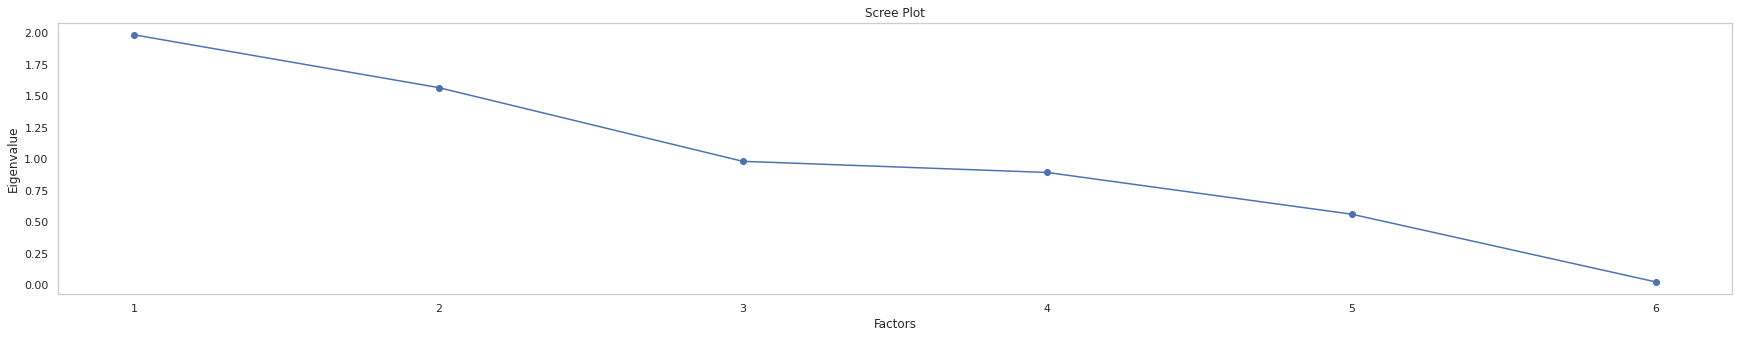

In [70]:
 # The scree plot method draws a straight line for each factor and its eigenvalues. 
# Number eigenvalues greater than one considered as the number of factors.

# Creating a scree plot using matplotlib
#
plt.scatter(range(1,df_factor.shape[1]+1),ev)
plt.plot(range(1,df_factor.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [71]:
# Checking at the factor loadings
# Creating factor analysis object and perform factor analysis
#
fa = FactorAnalyzer()
fa.analyze(df_factor, 2, rotation="varimax")
fa.loadings

# We will note that
# Factor 1 has high factor loadings for : bedrooms, bathrooms, sqlft_living, grade, sgft_above, sqft_living15
# Factor 2 has high factor loadings for : zipcode, long
# Factor 3 has high factor loadings for : sqlft_lot, sqft_lot15
# Factor 4 has high factor loadings for : sqft_basement 
# Factor 5 has high factor loadings for : view, waterfront
# Factor 6 has high factor loadings for : floors,yr_built 

# All factors have at least 1 high factor loadings hence we will use all of them.

,Factor1,Factor2
age,0.076372,-0.201543
tsh,-0.197748,0.106467
t3,0.056230,0.481977
tt4,0.836285,0.548974
t4u,-0.055442,0.834763
fti,0.991759,-0.111248


In [72]:
# Step 14: Getting variance of each factors

fa.get_factor_variance()

# Noting total 60% cumulative Variance explained by the 6 factors.

,Factor1,Factor2
SS Loadings,1.734131,1.294835
Proportion Var,0.289022,0.215806
Cumulative Var,0.289022,0.504828


From the Factor Analysis, the features can be grouped in 2 broad categories:

* Category 1: tt4 and fti
* Category 2: tt4 and t4u


##### Standardization

In [73]:
# Standardization function
def Standardization(X_train, X_test):
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  return X_train, X_test

##### Linear Discriminant Analysis

In [74]:
# LDA function
def Lda(X_train, X_test, y_train, components = None):
  lda = LDA(n_components= components)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)
  return X_train, X_test

##### Label Encoding

In [75]:
# Label encode Status column
df[['status']] = df[['status']].apply(LabelEncoder().fit_transform)
# Checking changes
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured
0,0,72.0,M,f,f,f,f,f,f,f,...,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,0,15.0,F,t,f,f,f,f,f,f,...,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n
2,0,24.0,M,f,f,f,f,f,f,f,...,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n
4,0,77.0,M,f,f,f,f,f,f,f,...,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n
5,0,85.0,F,f,f,f,f,t,f,f,...,138.0,y,1.1,y,27.0,y,1.19,y,23.0,n


##### One-Hot Encoding

In [76]:
# One-hot encoding categorical columns
df = pd.get_dummies(df)
# Checking changes
df.head()

,status,age,tsh,t3,tt4,t4u,fti,sex_F,sex_M,on_thyroxine_f,...,t3_measured_n,t3_measured_y,tt4_measured_n,tt4_measured_y,t4u_measured_n,t4u_measured_y,fti_measured_n,fti_measured_y,tbg_measured_n,tbg_measured_y
0,0,72.0,30.0,0.6,15.0,1.48,10.0,0,1,1,...,0,1,0,1,0,1,0,1,1,0
1,0,15.0,145.0,1.7,19.0,1.13,17.0,1,0,0,...,0,1,0,1,0,1,0,1,1,0
2,0,24.0,0.0,0.2,4.0,1.00,0.0,0,1,1,...,0,1,0,1,0,1,0,1,1,0
4,0,77.0,7.3,1.2,57.0,1.28,44.0,0,1,1,...,0,1,0,1,0,1,0,1,1,0
5,0,85.0,138.0,1.1,27.0,1.19,23.0,1,0,1,...,0,1,0,1,0,1,0,1,1,0


## 7. Modelling

### Part 1: Decision trees

#### Random Forest Classifier

In [77]:
# Features and label
X = df.drop('status', axis = 1)
y = df.status
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [78]:
# Standardization
X_train, X_test = Standardization(X_train, X_test)

# Training our data set
tree = RandomForestClassifier(n_estimators = 100, random_state=0,
                                min_samples_split = 2, max_depth= 5,
                                min_samples_leaf = 1 , max_features = 'auto')
forest = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()

,Actual,Predicted
count,601.000000,601.000000
mean,0.958403,0.966722
std,0.199834,0.179511
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [79]:
comparison_frame.head(10)

,Actual,Predicted
1896,1,1
374,1,1
1923,1,1
2321,1,1
1716,1,1
1408,1,1
497,1,1
318,1,1
2329,1,1
122,0,0


In [80]:
# Classification report
report = classification_report(y_test, y_pred)
print(f'Classification Report')
print(f'{"-"*70}\n')
print(f'{report}')

Classification Report
----------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.85      0.68      0.76        25
           1       0.99      0.99      0.99       576

    accuracy                           0.98       601
   macro avg       0.92      0.84      0.87       601
weighted avg       0.98      0.98      0.98       601



In [81]:
# Evaluating the model using confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[ 17   8]
 [  3 573]]
Accuracy 0.9816971713810316


> We have a 98.17% accuracy.

Feature Importance

In [82]:
# Important Features
# Get numerical feature importances
test_features = df.columns.to_list()
test_features.remove('status')
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.02), ('tsh', 0.28), ('t3', 0.08), ('tt4', 0.22), ('t4u', 0.03), ('fti', 0.32), ('sex_F', 0.0), ('sex_M', 0.0), ('on_thyroxine_f', 0.0), ('on_thyroxine_t', 0.0), ('query_on_thyroxine_f', 0.0), ('query_on_thyroxine_t', 0.0), ('on_antithyroid_medication_f', 0.0), ('on_antithyroid_medication_t', 0.0), ('thyroid_surgery_f', 0.0), ('thyroid_surgery_t', 0.0), ('query_hypothyroid_f', 0.0), ('query_hypothyroid_t', 0.0), ('query_hyperthyroid_f', 0.0), ('query_hyperthyroid_t', 0.0), ('pregnant_f', 0.0), ('pregnant_t', 0.0), ('sick_f', 0.0), ('sick_t', 0.0), ('tumor_f', 0.0), ('tumor_t', 0.0), ('lithium_f', 0.0), ('lithium_t', 0.0), ('goitre_f', 0.0), ('goitre_t', 0.0), ('tsh_measured_n', 0.0), ('tsh_measured_y', 0.01), ('t3_measured_n', 0.0), ('t3_measured_y', 0.0), ('tt4_measured_n', 0.0), ('tt4_measured_y', 0.0), ('t4u_measured_n', 0.0), ('t4u_measured_y', 0.0), ('fti_measured_n', 0.0), ('fti_measured_y', 0.0), ('tbg_measured_n', 0.0), ('tbg_measured_y', 0.0)]

Variable: fti         

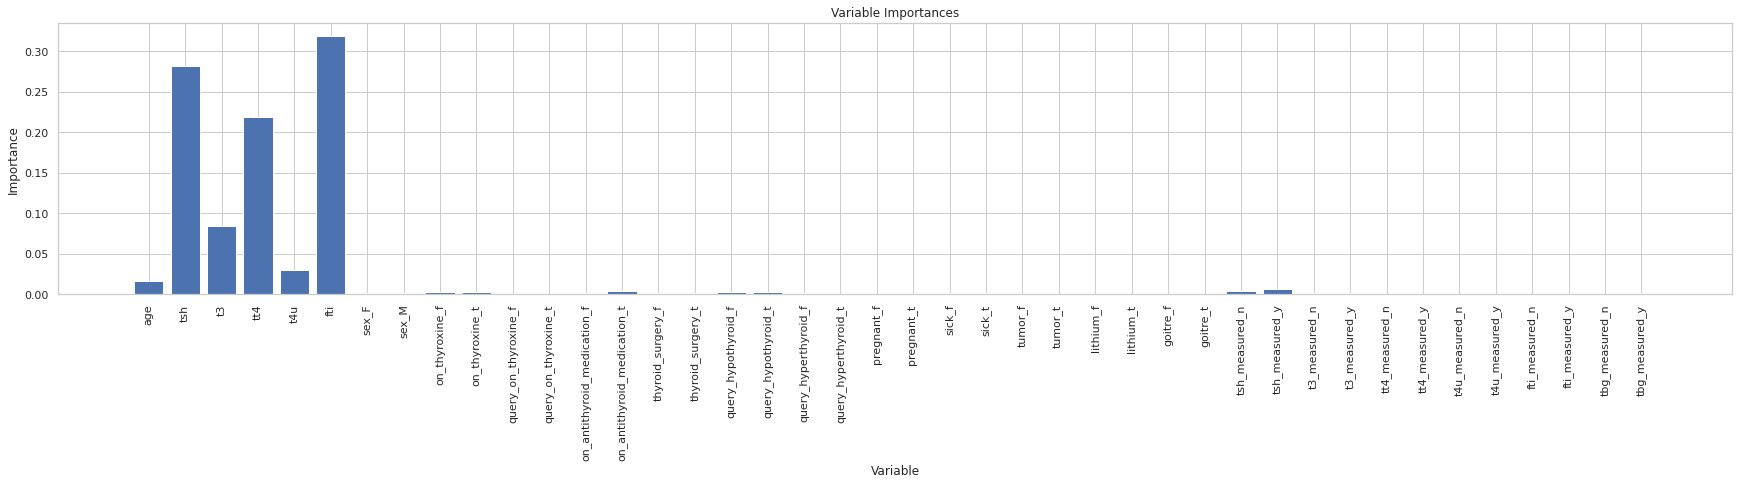

In [83]:
# Visualization
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

> The top 3 features with highest importance are tsh, tt4 and fti

In [84]:
# Fitting our model With three features
y = df['status'].values
test_features = ['tsh', 'tt4', 'fti']
X = df[test_features].values


# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardization
X_train, X_test = Standardization(X_train, X_test)

# Training our data set
tree = RandomForestClassifier(n_estimators = 100, random_state=0,
                                min_samples_split = 2, max_depth= 5,
                                min_samples_leaf = 1 , max_features = 'auto')
forest = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()

,Actual,Predicted
count,601.000000,601.000000
mean,0.958403,0.958403
std,0.199834,0.199834
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [85]:
# Evaluating the model using confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[ 22   3]
 [  3 573]]
Accuracy 0.9900166389351082


> With the three features, we get a 99% accuracy. This is clearly overfitting. This will be eliminated using hyperparameter tuning

Residual plots

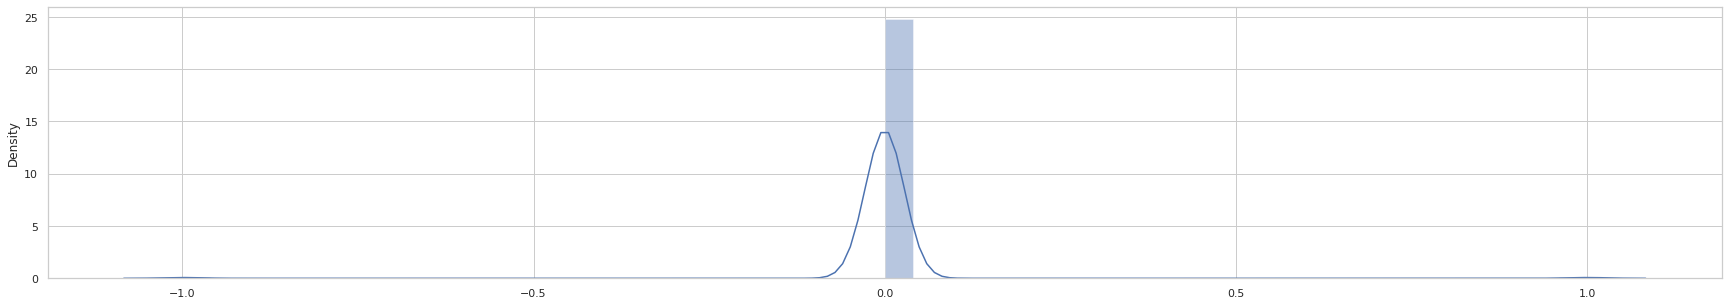

In [86]:
# Residual Plot
sb.distplot((y_test-y_pred),bins=50);

Hyperparameter Tuning

In [87]:
# Hypeperameter tuning using RandomizedSearchCV
params = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}
# Classifier
model = RandomForestClassifier()
rs_model = RandomizedSearchCV(estimator = model,
                            param_distributions= params,
                            n_iter=100,
                            scoring = 'f1',
                            cv= 10,
                            verbose= 1)
# Model training
rs_model.fit(X_train, y_train)
# Best parameters
print(f'Best parameters: {rs_model.best_params_}')
# Best scores
print(f'Best scores: {rs_model.best_score_}')

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters: {'n_estimators': 10, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}
Best scores: 0.9949814582795241


In [92]:
# Implementing selected hyperparameters
#Best parameters: {'n_estimators': 10, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}
# Standardization
X_train, X_test = Standardization(X_train, X_test)

params = {"n_estimators":[10],
        "max_depth": [20],
        "max_features": ["sqrt"],
        "min_samples_split": [4],
        "min_samples_leaf": [2]}
# Classifier
model = RandomForestClassifier()
rs_model = RandomizedSearchCV(estimator = model,
                            param_distributions= params,
                            n_iter=100,
                            scoring = 'f1',
                            cv= 10,
                            verbose= 1)
# Model training
rs_model = rs_model.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = rs_model.predict(X_test)

# Evaluating the model using confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[[ 22   3]
 [  4 572]]
Accuracy 0.9883527454242929


After hyperparameter tuning, we get 98.84% accuracy. This the best model we can get with this dataset.

Heteroscedasticity
> Bartlett’s test is used to check whether all samples have the same variance. It’s also called Bartlett’s test for homogeneity.We will consider the level of significance of alpha value to be 0.05

In [93]:
  # Bartlett's test
  residuals = y_pred - y_test
  test_statistic, p_value = bartlett(y_pred, residuals)
  print(f'\nP_Vlaue = {p_value}')
  print(f'test_statistic = {test_statistic}')

  # Degrees of freedom
  dff = len(y_pred - 1)
  probability = 1 - p_value
  # Critical value
  critical_value = chi2.ppf(probability, dff)
  print(f'Critical Value: {critical_value}')
  if (p_value < 0.05) and (test_statistic > critical_value ):
    print('Variances are unequal')
  else:
    print('Variances are equal')


P_Vlaue = 3.5627125412251476e-51
test_statistic = 226.43983617070342
Critical Value: inf
Variances are equal


> Our data is homogenious

#### Gradient Boosting

In [94]:
# Features and label
X = df.drop('status', axis = 1)
y = df.status
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [95]:
# Standardization
X_train, X_test = Standardization(X_train, X_test)

# Training our data set
gb = GradientBoostingClassifier(n_estimators = 100, random_state=0,
                                min_samples_split = 2, max_depth= 5,
                                min_samples_leaf = 1 , max_features = 'auto')
gb = gb.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = gb.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()

,Actual,Predicted
count,601.000000,601.000000
mean,0.958403,0.961730
std,0.199834,0.192006
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [96]:
comparison_frame.head(10)

,Actual,Predicted
1896,1,1
374,1,1
1923,1,1
2321,1,1
1716,1,1
1408,1,1
497,1,1
318,1,1
2329,1,1
122,0,0


In [97]:
# Classification report
report = classification_report(y_test, y_pred)
print(f'Classification Report')
print(f'{"-"*70}\n')
print(f'{report}')

Classification Report
----------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        25
           1       0.99      0.99      0.99       576

    accuracy                           0.98       601
   macro avg       0.91      0.88      0.89       601
weighted avg       0.98      0.98      0.98       601



In [98]:
# Evaluating the model using confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[ 19   6]
 [  4 572]]
Accuracy 0.9833610648918469


> We have an accuracy of 98.34 %

Feature Importance

In [99]:
# Important Features
# Get numerical feature importances
test_features = df.columns.to_list()
test_features.remove('status')
importances = list(gb.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.01), ('tsh', 0.19), ('t3', 0.02), ('tt4', 0.01), ('t4u', 0.02), ('fti', 0.71), ('sex_F', 0.0), ('sex_M', 0.0), ('on_thyroxine_f', 0.01), ('on_thyroxine_t', 0.01), ('query_on_thyroxine_f', 0.0), ('query_on_thyroxine_t', 0.0), ('on_antithyroid_medication_f', 0.0), ('on_antithyroid_medication_t', 0.01), ('thyroid_surgery_f', 0.01), ('thyroid_surgery_t', 0.01), ('query_hypothyroid_f', 0.0), ('query_hypothyroid_t', 0.0), ('query_hyperthyroid_f', 0.0), ('query_hyperthyroid_t', 0.0), ('pregnant_f', 0.0), ('pregnant_t', 0.0), ('sick_f', 0.0), ('sick_t', 0.0), ('tumor_f', 0.0), ('tumor_t', 0.0), ('lithium_f', 0.0), ('lithium_t', 0.0), ('goitre_f', 0.0), ('goitre_t', 0.0), ('tsh_measured_n', 0.0), ('tsh_measured_y', 0.0), ('t3_measured_n', 0.0), ('t3_measured_y', 0.0), ('tt4_measured_n', 0.0), ('tt4_measured_y', 0.0), ('t4u_measured_n', 0.0), ('t4u_measured_y', 0.0), ('fti_measured_n', 0.0), ('fti_measured_y', 0.0), ('tbg_measured_n', 0.0), ('tbg_measured_y', 0.0)]

Variable: fti     

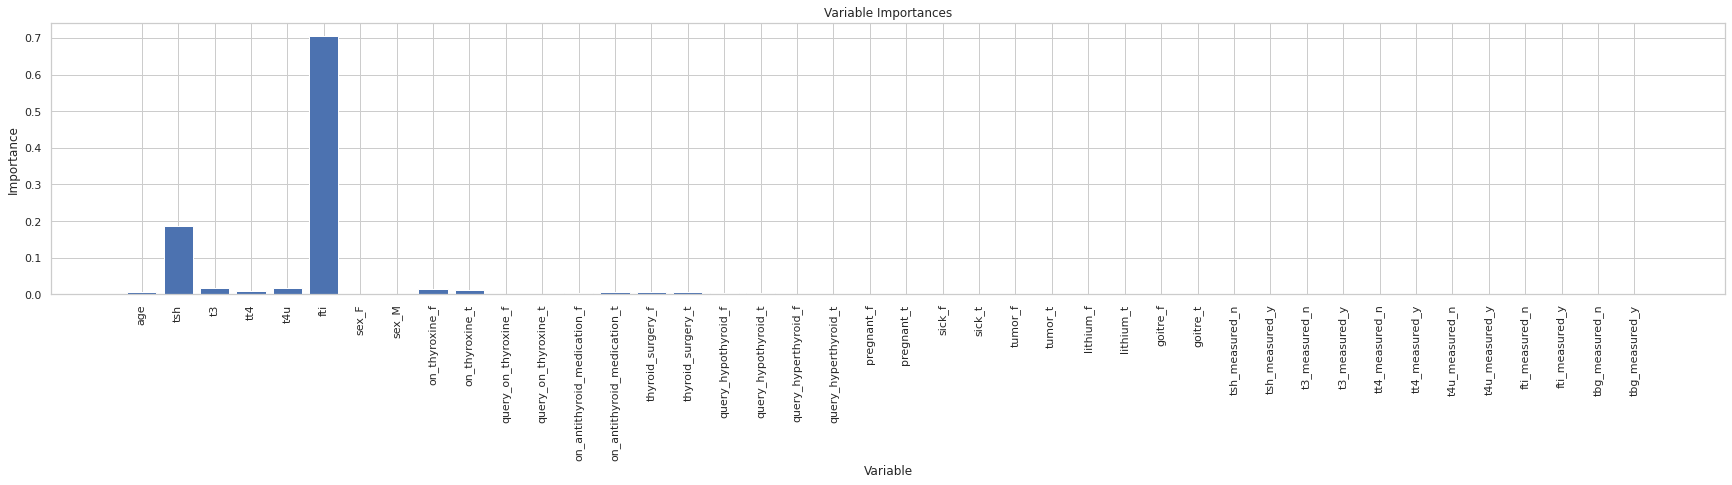

In [100]:
# Visualization
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

> We have two important features i.e tsh and fti

In [101]:
# Fitting our model With two features
y = df['status'].values
test_features = ['tsh','fti']
X = df[test_features].values


# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardization
X_train, X_test = Standardization(X_train, X_test)

# Training our data set
gb = GradientBoostingClassifier(n_estimators = 100, random_state=0,
                                min_samples_split = 2, max_depth= 5,
                                min_samples_leaf = 1 , max_features = 'auto')
gb = gb.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = gb.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()

,Actual,Predicted
count,601.000000,601.000000
mean,0.958403,0.958403
std,0.199834,0.199834
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [102]:
# Evaluating the model using confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[ 22   3]
 [  3 573]]
Accuracy 0.9900166389351082


> With the two features, we get accuracy of 99%. This might signify overfitting thus hyperparameter tuning needs to be done.

Residual Plots

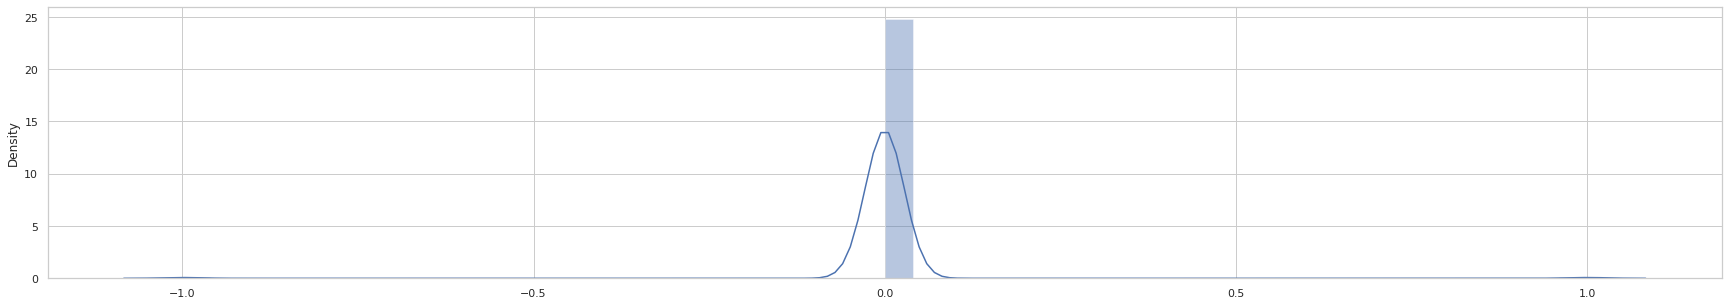

In [103]:
# Residual Plot
sb.distplot((y_test-y_pred),bins=50);

In [104]:
# Hypeperameter tuning using RandomizedSearchCV
params = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}
# Classifier
model = GradientBoostingClassifier()
gb = RandomizedSearchCV(estimator = model,
                            param_distributions= params,
                            n_iter=100,
                            scoring = 'f1',
                            cv= 10,
                            verbose= 1)
# Model training
gb.fit(X_train, y_train)
# Best parameters
print(f'Best parameters: {gb.best_params_}')
# Best scores
print(f'Best scores: {gb.best_score_}')

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters: {'n_estimators': 10, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 5}
Best scores: 0.9947683359579325


In [105]:
# Implementing selected hyperparameters
#Best parameters: {'n_estimators': 10, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 5}
params = {"n_estimators": [10],
        "max_depth": [5],
        "max_features": ["auto"],
        "min_samples_split":[4],
        "min_samples_leaf": [2]}
# Classifier
model = GradientBoostingClassifier()
gb = RandomizedSearchCV(estimator = model,
                            param_distributions= params,
                            n_iter=100,
                            scoring = 'f1',
                            cv= 10,
                            verbose= 1)

# Training our data set
gb = gb.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = gb.predict(X_test)

# Evaluating the model using confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[[ 22   3]
 [  3 573]]
Accuracy 0.9900166389351082


After hyperparameter tuning, we get 99% accuracy. This the best model we can get with this dataset.

Heteroscedasticity

In [106]:
  # Bartlett's test
  residuals = y_pred - y_test
  test_statistic, p_value = bartlett(y_pred, residuals)
  print(f'\nP_Vlaue = {p_value}')
  print(f'test_statistic = {test_statistic}')

  # Degrees of freedom
  dff = len(y_pred - 1)
  probability = 1 - p_value
  # Critical value
  critical_value = chi2.ppf(probability, dff)
  print(f'Critical Value: {critical_value}')
  if (p_value < 0.05) and (test_statistic > critical_value ):
    print('Variances are unequal')
  else:
    print('Variances are equal')


P_Vlaue = 5.242437958880841e-60
test_statistic = 266.9505685266534
Critical Value: inf
Variances are equal


#### Conclusion

* With Gradient boosting achieving an accuracy score of 99%,and Random Forest achieving an accuracy of 98.84% percent,will pick rabdom classifier to trade off overfitting.
* The features that are most impactful in influencing the prediction are:
  * tsh
  * fti
  * tt4



### Part 2: SVM:

> We will use the most important two features from the decision trees for analysis in this section, i.e tsh and fti

##### Linear Kernel

In [78]:
# We are going to use tsh and fti as our classifying criteria. So we plot the two columns to see if we can apply svm on them
def DesiredFeaturesPlot(x, y, data, hue, palette):
  sb.lmplot(x, y, data = data, hue = hue, palette = palette, fit_reg = False, scatter_kws = {'s': 70})
  plt.title('Category Distribution', y = 1.05);

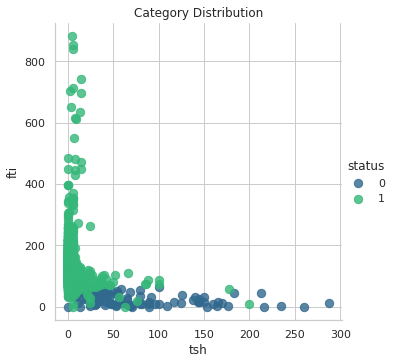

In [79]:
# Distribution of categories
DesiredFeaturesPlot('tsh','fti', df, 'status', 'viridis')

In [80]:
# Training the model
# Specify the input for the model

X = df[['tsh', 'fti']]
# Put a label of either a status no or not and assign it 0 or 1
y = np.where(df['status']==0,0,1)

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fit the model
model = SVC(kernel= 'linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

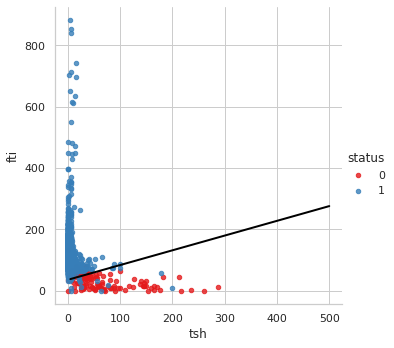

In [81]:
# Get the separating hyperplane
w = model.coef_[0] #get the first coefficient of our model
a = -w[0] / w[1]
# Get the x values of our hyperplane. 
xx = np.linspace(5, 500)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the hyperplane
sb.lmplot('tsh', 'fti', data=df, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 20})
plt.plot(xx, yy, linewidth=2, color='black');

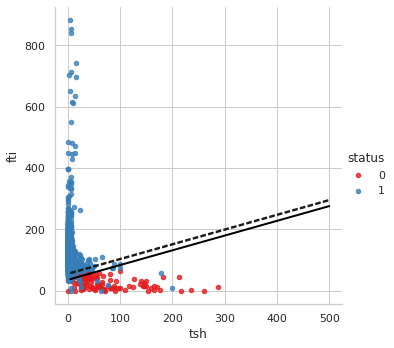

In [82]:
# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# Look at the margins and support vectors
sb.lmplot('tsh', 'fti', data=df, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 20})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--') #'k--' indicates that we want to draw a black dotted line
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],s=80, facecolors='none');


In [83]:
# Predict based on the model we've trained
y_pred = model.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()

,Actual,Predicted
count,601.000000,601.000000
mean,0.958403,0.968386
std,0.199834,0.175116
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [84]:
comparison_frame.head(10)

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,0,0


In [85]:
# Classification report
report = classification_report(y_test, y_pred)
print(f'Classification Report')
print(f'{"-"*70}\n')
print(f'{report}')

Classification Report
----------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.79      0.60      0.68        25
           1       0.98      0.99      0.99       576

    accuracy                           0.98       601
   macro avg       0.89      0.80      0.83       601
weighted avg       0.97      0.98      0.98       601



In [86]:
# Evaluating the model using confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[ 15  10]
 [  4 572]]
Accuracy 0.9767054908485857


> We get 97.67% Accuracy

##### Polynomial Kernel

In [87]:
# Training the model
# Specify the input for the model

X = df[['tsh', 'fti']]
# Put a label of either a status no or not and assign it 0 or 1
y = np.where(df['status']==0,0,1)

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fit the model
polyclassifier = SVC(kernel= 'poly')
polyclassifier.fit(X_train,y_train)

SVC(kernel='poly')

In [1]:
# # Create a mesh grid for our graph
# def make_meshgrid(x, y, h=.02):
#     x_min, x_max = x.min() - 1, x.max() + 1
#     y_min, y_max = y.min() - 1, y.max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#     return xx, yy

# # A function that creates the hyperplanes from our model
# def plot_contours(ax, clf, xx, yy, **params):
#     Z = polyclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
#     out = ax.contourf(xx, yy, Z, **params)
#     return out

# fig, ax = plt.subplots()
# # title for the plots
# title = ('status Classification with polynomial SVC')
# # Set-up grid for plotting.
# X0, X1 = df.tsh, df.fti
# xx, yy = make_meshgrid(X0, X1)

# plot_contours(ax, polyclassifier, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
# ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
# ax.set_xticks(())
# ax.set_yticks(())
# ax.set_title(title)
# plt.show()

> This step crashed after using all available RAM. Will be runned on another PC

In [88]:
# Predict based on the model we've trained
y_pred = polyclassifier.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()

,Actual,Predicted
count,601.000000,601.000000
mean,0.958403,0.958403
std,0.199834,0.199834
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [89]:
comparison_frame.head(10)

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,0,0


In [90]:
# Classification report
report = classification_report(y_test, y_pred)
print(f'Classification Report')
print(f'{"-"*70}\n')
print(f'{report}')

Classification Report
----------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        25
           1       0.99      0.99      0.99       576

    accuracy                           0.98       601
   macro avg       0.85      0.85      0.85       601
weighted avg       0.98      0.98      0.98       601



In [91]:
# Evaluating the model using confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[ 18   7]
 [  7 569]]
Accuracy 0.9767054908485857


> We get 97.67% Accuracy

#### rbf kernel

In [92]:
# Training the model
# Specify the input for the model

X = df[['tsh', 'fti']]
# Put a label of either a status no or not and assign it 0 or 1
y = np.where(df['status']==0,0,1)

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fit the model
rbfclassifier = SVC(kernel= 'rbf')
rbfclassifier.fit(X_train,y_train)

SVC()

In [93]:
df.head()

,status,age,tsh,t3,tt4,t4u,fti,sex_F,sex_M,on_thyroxine_f,...,t3_measured_n,t3_measured_y,tt4_measured_n,tt4_measured_y,t4u_measured_n,t4u_measured_y,fti_measured_n,fti_measured_y,tbg_measured_n,tbg_measured_y
0,0,72.0,30.0,0.6,15.0,1.48,10.0,0,1,1,...,0,1,0,1,0,1,0,1,1,0
1,0,15.0,145.0,1.7,19.0,1.13,17.0,1,0,0,...,0,1,0,1,0,1,0,1,1,0
2,0,24.0,0.0,0.2,4.0,1.00,0.0,0,1,1,...,0,1,0,1,0,1,0,1,1,0
4,0,77.0,7.3,1.2,57.0,1.28,44.0,0,1,1,...,0,1,0,1,0,1,0,1,1,0
5,0,85.0,138.0,1.1,27.0,1.19,23.0,1,0,1,...,0,1,0,1,0,1,0,1,1,0


In [2]:
# # Create a mesh grid for our graph
# def make_meshgrid(x, y, h=.02):
#     x_min, x_max = x.min() - 1, x.max() + 1
#     y_min, y_max = y.min() - 1, y.max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#     return xx, yy

# # A function that creates the hyperplanes from our model
# def plot_contours(ax, clf, xx, yy, **params):
#     Z = rbfclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
#     out = ax.contourf(xx, yy, Z, **params)
#     return out

# fig, ax = plt.subplots()
# # title for the plots
# title = ('Status Classification with rbf SVC')
# # Set-up grid for plotting.
# X0, X1 = df.tsh, df.fti
# xx, yy = make_meshgrid(X0, X1)

# plot_contours(ax, rbfclassifier, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
# ax.scatter(X0, X1, c=y, cmap=plt.cm.autumn, s=20, edgecolors='k')

# ax.set_xticks(())
# ax.set_yticks(())
# ax.set_title(title)
# plt.show()

> This step crashed after using all available RAM. Will be runned on another PC

In [94]:
# Predict based on the model we've trained
y_pred = rbfclassifier.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()

,Actual,Predicted
count,601.000000,601.000000
mean,0.958403,0.966722
std,0.199834,0.179511
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [95]:
# Classification report
report = classification_report(y_test, y_pred)
print(f'Classification Report')
print(f'{"-"*70}\n')
print(f'{report}')

Classification Report
----------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.85      0.68      0.76        25
           1       0.99      0.99      0.99       576

    accuracy                           0.98       601
   macro avg       0.92      0.84      0.87       601
weighted avg       0.98      0.98      0.98       601



In [96]:
# Evaluating the model using confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[ 17   8]
 [  3 573]]
Accuracy 0.9816971713810316


> We get 98.17% Accuracy

#### Sigmoid Kernel

In [97]:
# Training the model
# Specify the input for the model

X = df[['tsh', 'fti']]
# Put a label of either a status no or not and assign it 0 or 1
y = np.where(df['status']==0,0,1)

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fit the model
sigclassifier = SVC(kernel= 'sigmoid')
sigclassifier.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [84]:
# # Create a mesh grid for our graph
# def make_meshgrid(x, y, h=.02):
#     x_min, x_max = x.min() - 1, x.max() + 1
#     y_min, y_max = y.min() - 1, y.max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#     return xx, yy

# # A function that creates the hyperplanes from our model
# def plot_contours(ax, clf, xx, yy, **params):
#     Z = sigclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
#     out = ax.contourf(xx, yy, Z, **params)
#     return out

# fig, ax = plt.subplots()
# # title for the plots
# title = ('Status Classification with sigmoid SVC')
# # Set-up grid for plotting.
# X0, X1 = df.tsh, df.fti
# xx, yy = make_meshgrid(X0, X1)

# plot_contours(ax, sigclassifier, xx, yy, cmap=plt.cm.cool, alpha=0.8)
# ax.scatter(X0, X1, c=y, cmap=plt.cm.cool, s=20, edgecolors='k')
# ax.set_xticks(())
# ax.set_yticks(())
# ax.set_title(title)
# plt.show()

> This step crashed after using all available RAM. Will be runned on another PC

In [98]:
# Predict based on the model we've trained
y_pred = sigclassifier.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()

,Actual,Predicted
count,601.000000,601.000000
mean,0.958403,0.963394
std,0.199834,0.187948
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [99]:
# Classification report
report = classification_report(y_test, y_pred)
print(f'Classification Report')
print(f'{"-"*70}\n')
print(f'{report}')

Classification Report
----------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.36      0.32      0.34        25
           1       0.97      0.98      0.97       576

    accuracy                           0.95       601
   macro avg       0.67      0.65      0.66       601
weighted avg       0.95      0.95      0.95       601



In [100]:
# Evaluating the model using confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[  8  17]
 [ 14 562]]
Accuracy 0.9484193011647255


> We get 94.84% Accuracy

From the analysis, rbf kernel has the highest accuracy at 98.17%. However, it might be overfitting, to get the best SVM model, we will do hypeparameter tuning.

Hypeparameter tuning

In [ ]:
# Hyperparameters to be used during tuning .
params = {'C' : [2**(-5), 2**(-4), 2**(-3), 2**(-2), 2**(-1), 1, 2, 4, 8, 16, 35],
              'gamma': ['scale', 'auto'],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': [2, 3, 4, 5]}
# Classifier
model = SVC()
rs_model = RandomizedSearchCV(estimator = model,
                            param_distributions= params,
                            n_iter=100,
                            scoring = 'f1',
                            cv= 10,
                            verbose= 1)
# Model training
rs_model.fit(X_train, y_train)
# Best parameters
print(f'Best parameters: {rs_model.best_params_}')
# Best scores
print(f'Best scores: {rs_model.best_score_}')

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


Best parameters: {'kernel': 'rbf', 'gamma': 'auto', 'degree': 2, 'C': 2}
Best scores: 0.9829760049007135


In [101]:
# Implementing selected hyperparameters
#Best parameters: {'n_estimators': 10, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 5}
params = {'C' : [2],
              'gamma': ['auto'],
              'kernel': ['rbf'],
              'degree': [2]}
# Classifier
model = SVC()
svm = RandomizedSearchCV(estimator = model,
                            param_distributions= params,
                            n_iter=100,
                            scoring = 'f1',
                            cv= 10,
                            verbose= 1)
# Training our data set
svm = svm.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = svm.predict(X_test)

# Evaluating the model using confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[[  5  20]
 [  0 576]]
Accuracy 0.9667221297836939


We get 96.67% Accuracy

#### Using the Best Kernel + Best hypaparameters + Multiple Features

In [102]:
# Features and label
X = df.drop('status', axis = 1)
y = y = np.where(df['status']==0,0,1)
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

params = {'C' : [2],
              'gamma': ['auto'],
              'kernel': ['rbf'],
              'degree': [2]}
# Classifier
model = SVC()
svm = RandomizedSearchCV(estimator = model,
                            param_distributions= params,
                            n_iter=100,
                            scoring = 'f1',
                            cv= 10,
                            verbose= 1)
# Training our data set
svm = svm.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = svm.predict(X_test)

# Evaluating the model using confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[[  3  22]
 [  1 575]]
Accuracy 0.961730449251248


We get 96.17% Accuracy

#### Conclusion

> Compare the multiple-features model  with the 2-features model

Tuned Models
* 2-features model Accuracy: 96.67%
* Multiple feature model Accuracy: 96.17%

## 8. Implementing the Solution

## 9. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






## 10. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

> Yes.

### b). Do we need other data to answer our question?

> No

### c). Did we have the right question?

> Yes